In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
# Read the Excel sheet
df = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='Germina', usecols=['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410'])#, parse_dates=['H'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1_180  238 non-null    object
 1   T9_180  255 non-null    object
 2   T1_250  258 non-null    object
 3   T9_250  259 non-null    object
 4   T1_395  254 non-null    object
 5   T9_395  257 non-null    object
 6   T1_410  260 non-null    object
 7   T9_410  260 non-null    object
dtypes: object(8)
memory usage: 16.4+ KB


In [67]:
# Remove 'h' from values while preserving non-string values
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.replace(' h', '') if isinstance(x, str) else x)

df.head(20)

T1_180 T9_180 T1_250 T9_250 T1_395 T9_395 T1_410 T9_410
0      12     28     14     13     16     15     10     10
1      28     28     14     13     16     35     29     28
2      12     28      9     13     16     35     30     11
3      12     13      9     13     16     15     30     28
4      28     28      9     13     16     15     30     28
5      28     28      9     13     35     15     29     29
6      28     13     14     13     58     15     29     29
7      12     28     15     13     35     84     37     28
8      13     13     15     13     35     16     30     29
9      13     13     15     13     35     16     37     10
10     13     13      9     13     35     16     10     28
11    NaN     13     15      9     35     16     37     28
12     12     13      9     13     35     16     37     10
13     28     28     14     13     16     15     10     10
14     28     28     14     13     35     15     29     11
15     54     28     14     13     16     15     30     11
16     12     13     14     13     35     15     37     28
17     54     13     14     56     16     15     37     28
18     12     13     14     13     16     15     29     29
19     12     13     15     13     16     15     29     10

In [69]:
df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']]=df[['T1_180', 'T9_180', 'T1_250', 'T9_250', 'T1_395',
       'T9_395', 'T1_410', 'T9_410']].astype('float')
#df['Time']=melted_df['Time'].astype('float')

No handles with labels found to put in legend.


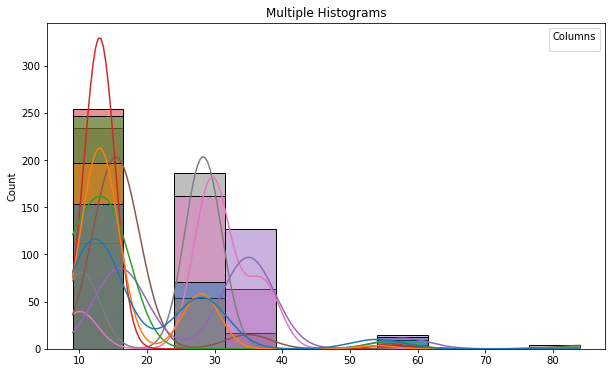

In [70]:
# Plot multiple histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=10, kde=True)
plt.legend(title="Columns")
plt.title("Multiple Histograms")
plt.show()

<AxesSubplot:ylabel='Count'>

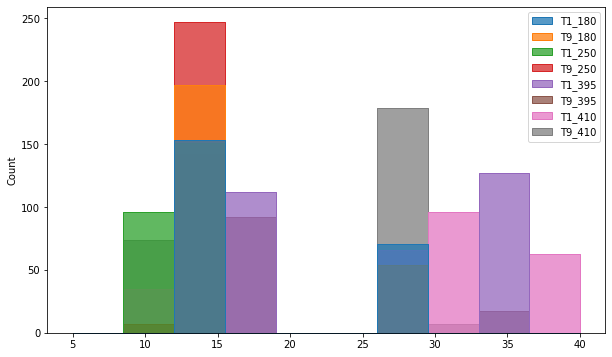

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, bins=10, binrange=(5,40), element="step")

In [111]:
melted_df['Time'].min()

9.0

In [76]:
# Melt the DataFrame to create 'Measurement' and 'Value' columns
melted_df = pd.melt(df, var_name="Measurement", value_name="Time")

In [77]:
melted_df.head()

Measurement  Time
0      T1_180  12.0
1      T1_180  28.0
2      T1_180  12.0
3      T1_180  12.0
4      T1_180  28.0

In [78]:
# Extract the measurement type (T1 or T9) from the column name
melted_df["Type"] = melted_df["Measurement"].str.split("_").str[0]
melted_df["UV"] = melted_df["Measurement"].str.split("_").str[1]



In [79]:
melted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Measurement  2080 non-null   object 
 1   Time         2041 non-null   float64
 2   Type         2080 non-null   object 
 3   UV           2080 non-null   object 
dtypes: float64(1), object(3)
memory usage: 65.1+ KB


In [80]:
melted_df['UV']=melted_df['UV'].astype('category')
melted_df['Time']=melted_df['Time'].astype('float')

<AxesSubplot:xlabel='UV', ylabel='Time'>

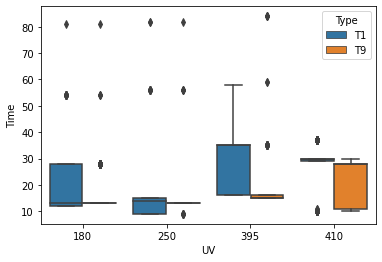

In [118]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Type")

<AxesSubplot:xlabel='UV', ylabel='Time'>

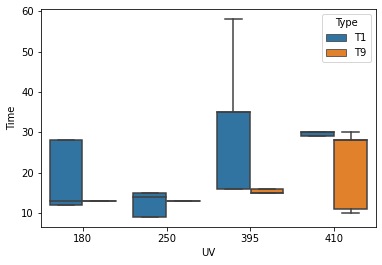

In [119]:
sns.boxplot(data=melted_df, x="UV", y="Time", hue="Type", showfliers = False)

<AxesSubplot:xlabel='Time', ylabel='Count'>

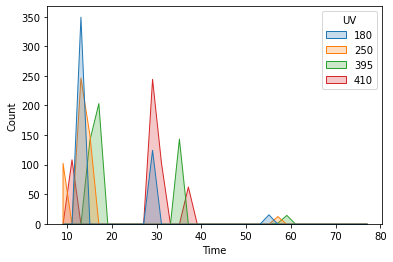

In [114]:
sns.histplot(data=melted_df,x="Time", hue="UV",element="poly", bins=range(8,80,2))

<AxesSubplot:xlabel='Time', ylabel='Count'>

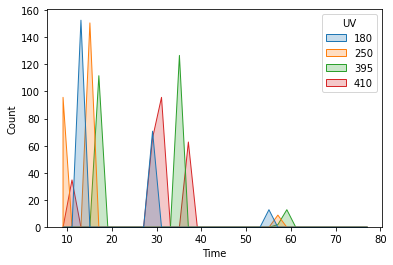

In [115]:
sns.histplot(data=melted_df[melted_df['Type']=='T1'],x="Time", hue="UV",element="poly", bins=range(8,80,2))

<AxesSubplot:xlabel='Time', ylabel='Count'>

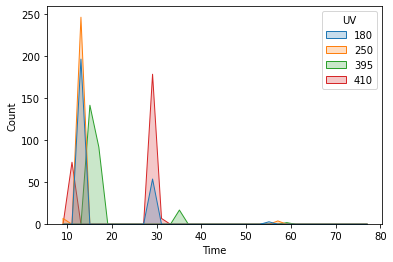

In [116]:
sns.histplot(data=melted_df[melted_df['Type']=='T9'],x="Time", hue="UV",element="poly", bins=range(8,80,2))

<AxesSubplot:xlabel='Time', ylabel='Density'>

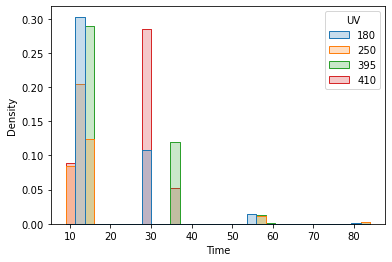

In [117]:
sns.histplot(
    melted_df, x="Time", hue="UV", element="step",
    stat="density", common_norm=False,
)

<AxesSubplot:xlabel='Time', ylabel='UV'>

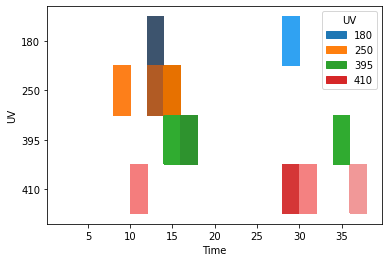

In [95]:
sns.histplot(data=melted_df, x="Time", y="UV", hue="UV", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='UV'>

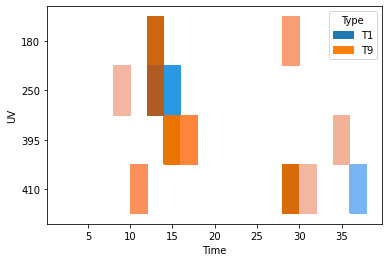

In [96]:
sns.histplot(data=melted_df, x="Time", y="UV", hue="Type", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='Type'>

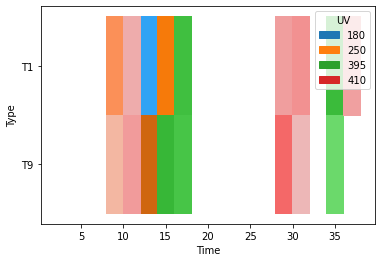

In [97]:
sns.histplot(data=melted_df, x="Time", y="Type", hue="UV", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='UV'>

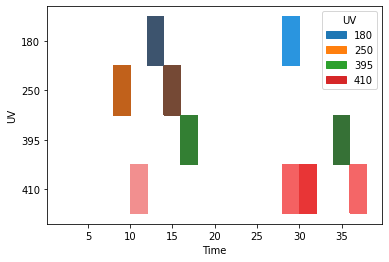

In [98]:
sns.histplot(data=melted_df[melted_df['Type']=='T1'], x="Time", y="UV", hue="UV", bins=range(2,40,2))

<AxesSubplot:xlabel='Time', ylabel='UV'>

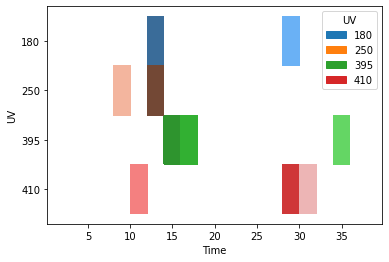

In [99]:
sns.histplot(data=melted_df[melted_df['Type']=='T9'], x="Time", y="UV", hue="UV", bins=range(2,40,2))

In [52]:
melted_df.head()

Measurement  Time Type   UV
0      T1_180  12.0   T1  180
1      T1_180  28.0   T1  180
2      T1_180  12.0   T1  180
3      T1_180  12.0   T1  180
4      T1_180  28.0   T1  180

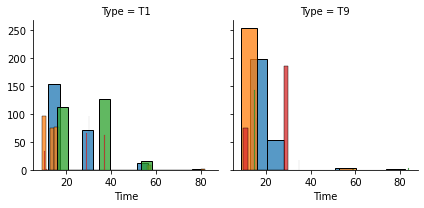

In [107]:
g = sns.FacetGrid(melted_df, col="Type", hue='UV')
g.map(sns.histplot, "Time")
#g.set_titles(col_template="{col_name}")
plt.show()

In [49]:
sns.histplot?

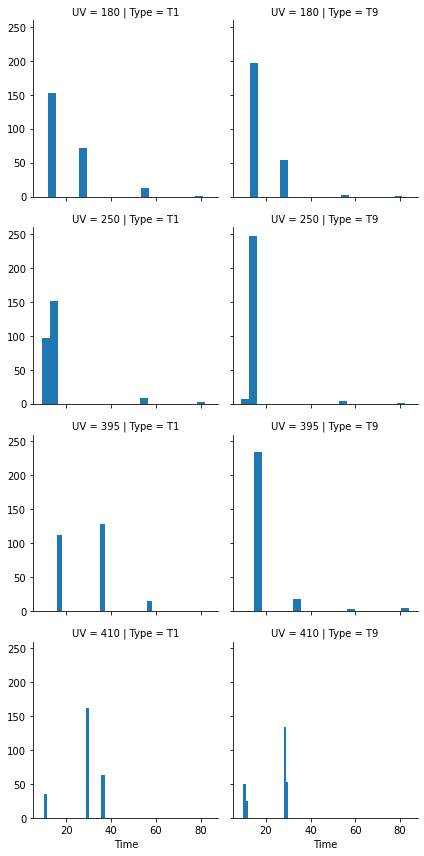

In [104]:
# Plot histograms grouped by 'Measurement_Type', using FacetGrid
g = sns.FacetGrid(melted_df, col="Type",row="UV")
g.map(plt.hist, "Time", bins=20)
#g.set_titles(col_template="{col_name}")
plt.show()

In [15]:
melted_df.shape

(2080, 4)

In [16]:
new_df = df[:240][['T1_180']].copy()
new_df

T1_180
0       12
1       28
2       12
3       12
4       28
..     ...
235     13
236    NaN
237     28
238     28
239     13

[240 rows x 1 columns]

In [30]:
new_df['T1_180']=new_df['T1_180'].astype(float)

In [17]:
# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['T1_180']):
        flag = 0
    else:
        flag = 1
    return flag
  
# Create a censorship flag column
new_df['observed'] = new_df.apply(check_observed, axis=1)

# Print average of observed
print(np.average(new_df['observed']))

0.9916666666666667


In [18]:
# Count censored data
count = len(new_df[new_df['observed'] == 0])

# Print the count to console
print(count)

2


In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   T1_180    238 non-null    float64
 1   observed  240 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.9 KB


In [35]:
new_df_cleaned = new_df.dropna(subset=['T1_180', 'observed'])

In [36]:
import lifelines 

In [37]:
kmf = lifelines.KaplanMeierFitter()


#kmf.plot_survival_function()

In [38]:
kmf.fit(durations= new_df_cleaned['T1_180'], event_observed= new_df_cleaned['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 238 total observations, 0 right-censored observations>

<AxesSubplot:xlabel='timeline'>

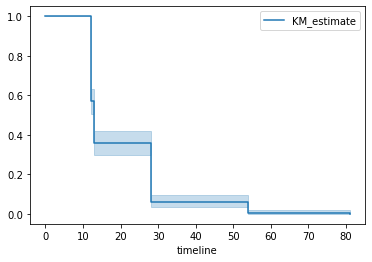

In [39]:
kmf.plot_survival_function()